# Inspecting the Model Acc Test Results

In [307]:
import pandas as pd
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn

In [367]:
experiments = pd.read_csv('model_search/' + 'all_model_runs.csv')
experiments = experiments[~(experiments.evaluation_dataset == '2000test')]

(0.5, 1)

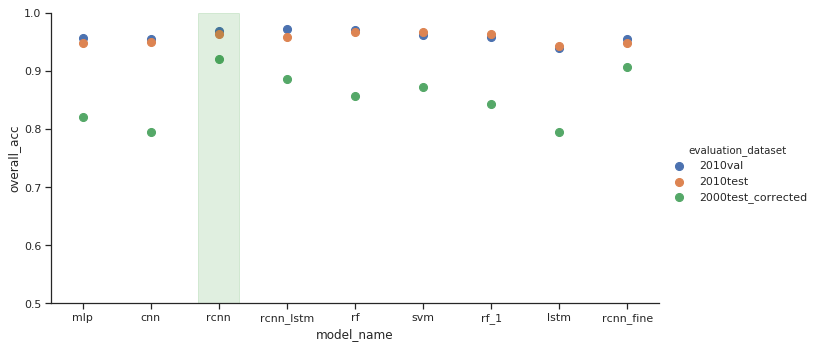

In [368]:
seaborn.set(style='ticks')


fg = seaborn.FacetGrid(data=experiments, hue='evaluation_dataset', height=5, aspect=1.95)
fg.map(pyplot.scatter, 'model_name', 'overall_acc', s=65).add_legend()
plt.axvspan(1.7, 2.3, alpha=0.12, color='green')
plt.ylim(0.5, 1)
#plt.savefig('model_comparisons.png', dpi=600)

(0.6, 1)

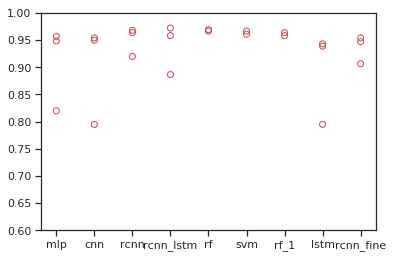

In [332]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(experiments['model_name'], experiments['overall_acc'], facecolors='none', edgecolors='r')
ax.set_ylim(.6,1)

In [333]:
from random import uniform

x_spacing = []
for index, exp in experiments.iterrows():
    if exp['model_name'] == 'mlp':
        x_location = 1
    elif exp['model_name'] == 'cnn':
        x_location = 2
    elif exp['model_name'] == 'rcnn':
        x_location = 3
    elif exp['model_name'] == 'rcnn_lstm':
        x_location = 4
    elif exp['model_name'] == 'rf':
        x_location = 5
    elif exp['model_name'] == 'svm':
        x_location = 6
    elif exp['model_name'] == 'rf_1':
        x_location = 7
    elif exp['model_name'] == 'lstm':
        x_location = 8
    elif exp['model_name'] == 'rcnn_fine':
        x_location = 9
        
    if exp['evaluation_dataset'] == '2000test_corrected':
        x_location += 0.3
    elif exp['evaluation_dataset'] == '2010test':
        x_location += 0
    elif exp['evaluation_dataset'] == '2010val':
        x_location -= 0.3
    x_location += uniform(0, 0.03)
    x_spacing.append(x_location)
x_spacing

[0.7186702395288513,
 1.017259964989987,
 1.720953509857905,
 2.00445591762491,
 2.7116227209887405,
 3.0273491549488067,
 4.015896465575572,
 3.715431696893138,
 4.729945928263302,
 5.009599388192581,
 6.015290786412722,
 5.709625864892123,
 6.707794855071863,
 7.006312368237519,
 7.714278907442926,
 8.012059987313581,
 9.003589110350951,
 8.710296394280602,
 3.321254398823594,
 2.329966014708747,
 1.3247388836988714,
 4.31531923859302,
 8.308485300275477,
 9.312476307548506]

In [334]:
x_spacing = np.array(x_spacing)

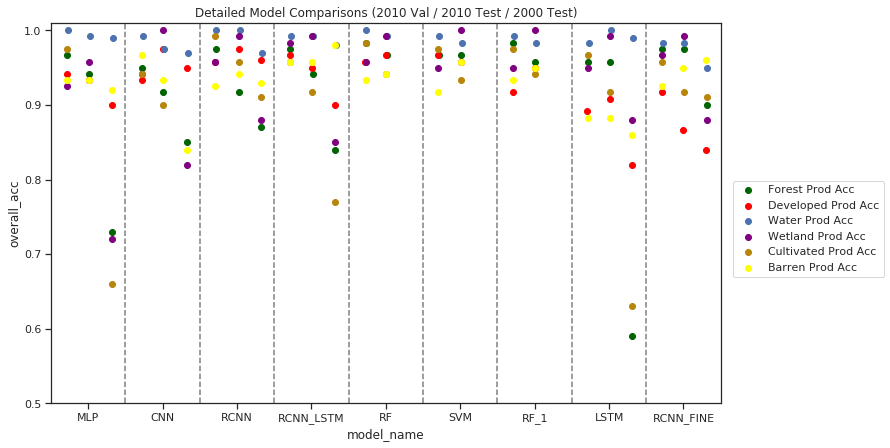

In [335]:
fig, ax = plt.subplots(figsize=(12,7))

jitter = 0.01

ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['forest_acc_prod'], label='Forest Prod Acc', marker='o', facecolors='darkgreen', edgecolors='darkgreen')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['dev_acc_prod'], label='Developed Prod Acc', marker='o', facecolors='red', edgecolors='red')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['water_acc_prod'], label='Water Prod Acc', marker='o', facecolors='b', edgecolors='b')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['wetland_acc_prod'], label='Wetland Prod Acc', marker='o', facecolors='purple', edgecolors='purple')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['cult_acc_prod'], label='Cultivated Prod Acc', marker='o', facecolors='darkgoldenrod', edgecolors='darkgoldenrod')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['barren_acc_prod'], label='Barren Prod Acc', marker='o', facecolors='yellow', edgecolors='yellow')
ax.set_ylim(0.50,1.01)

ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=2.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=3.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=4.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=6.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=7.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=8.5, c='black', linestyle='--', alpha=0.5)
#ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.set_xlim(0.5,9.5)

ax.set_xticklabels(['empty','MLP', 'CNN', 'RCNN', 'RCNN_LSTM', 'RF', 'SVM', 'RF_1', 'LSTM', 'RCNN_FINE'])
ax.set_xlabel('model_name')
ax.set_ylabel('overall_acc')
ax.set_title('Detailed Model Comparisons (2010 Val / 2010 Test / 2000 Test)')
ax.legend(bbox_to_anchor=(1.01, 0.6))
#fig.savefig('detailed_model_comparisons.png', bbox_inches='tight', dpi=600)

In [359]:
experiments_trained = experiments[~(experiments.evaluation_dataset == '2000test_corrected')]
experiments_trained['timestamp'] = pd.to_datetime(experiments_trained['training_time'].str.slice(7))
experiments_trained['time'] = experiments_trained['timestamp'].dt.hour * 3600 + experiments_trained['timestamp'].dt.minute * 60 + experiments_trained['timestamp'].dt.second

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


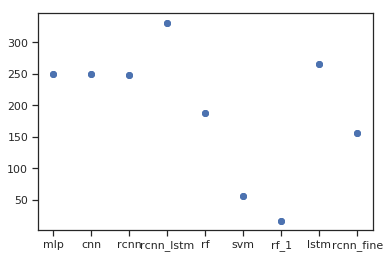

In [361]:
fig, ax = plt.subplots()
ax.scatter(experiments_trained['model_name'], experiments_trained['time'])# facecolors='none', edgecolors='r')
#ax.set_ylim(.6,1)